In [82]:
import src.tmlsm.data_t2 as td2
import importlib
from pathlib import Path
import os
import jax.numpy as jnp
import src.tmlsm.visualization as vis
importlib.reload(vis)
importlib.reload(td2)
import jax
import jax.random as jrandom
import src.tmlsm.models as tm
import src.tmlsm.losses as tl
importlib.reload(tm)
importlib.reload(tl)

<module 'src.tmlsm.losses' from 'c:\\Users\\alexp\\Desktop\\#Uni\\Master 1\\5. Semester\\PAML Tutorium\\Repo\\ML-Tutorial-WS25_26\\ffnn_introduction\\src\\tmlsm\\losses.py'>

In [2]:
# Global Variables

# Define the structural tensor
G_ti = jnp.array([[4.0, 0.0, 0.0],
                  [0.0, 0.5, 0.0],
                  [0.0, 0.0, 0.5]])

master_key = jrandom.PRNGKey(0)

In [ ]:
current_folder = Path(os.getcwd())
base_path = current_folder.parent / "hyperelasticity" / "data"
base_path = str(base_path)
# base_path = r"C:\Users\alexp\Desktop\#Uni\Master 1\5. Semester\PAML Tutorium\Repo\ML-Tutorial-WS25_26\hyperelasticity\data"
# Lukas C:\Users\fromm\OneDrive\Master\Tutorium Machine Learning
# Alex C:\Users\alexp\Desktop\Tutorium Neu
# Alex_home C:\Users\alexp\Desktop\#Uni\Master 1\5. Semester\PAML Tutorium\Repo\ML-Tutorial-WS25_26\hyperelasticity\data
F_uni, P_uni, W_uni = td2.load_hyperelastic_data(os.path.join(base_path, r"calibration\uniaxial.txt"))
F_ps, P_ps, W_ps = td2.load_hyperelastic_data(os.path.join(base_path, r"calibration\pure_shear.txt"))
F_bi, P_bi, W_bi = td2.load_hyperelastic_data(os.path.join(base_path, r"calibration\biaxial.txt"))
F_bi_test, P_bi_test, W_bi_test = td2.load_hyperelastic_data(os.path.join(base_path, r"test\biax_test.txt"))

# right Cauchy Green tensor
C_uni = F_uni.transpose(0, 2, 1) @ F_uni 
C_ps = F_ps.transpose(0, 2, 1) @ F_ps 
C_bi = F_bi.transpose(0, 2, 1) @ F_bi 
C_bi_test = F_bi_test.transpose(0, 2, 1) @ F_bi_test

# Convert to JAX array
F_bi_jx = jnp.array(F_bi)
P_bi_jx = jnp.array(P_bi)
C_bi_jx = jnp.array(C_bi)

F_uni_jx = jnp.array(F_uni)  
P_uni_jx = jnp.array(P_uni)
C_uni_jx = jnp.array(C_uni)

F_ps_jx = jnp.array(F_bi)  
P_ps_jx = jnp.array(P_ps)
C_ps_jx = jnp.array(C_ps)

F_bi_test_jx = jnp.array(F_bi_test)  
P_bi_test_jx = jnp.array(P_bi_test)
C_bi_test_jx = jnp.array(C_bi_test)

#compute invariants
bi_invariants_computed = td2.compute_all_invariants(F_bi_jx, G_ti)
uni_invariants_computed = td2.compute_all_invariants(F_uni_jx, G_ti)
ps_invariants_computed = td2.compute_all_invariants(F_ps_jx, G_ti)
bi_test_invariants_computed = td2.compute_all_invariants(F_bi_test_jx, G_ti)

# Load reference data
invariants_reference = td2.load_invariants(
    os.path.join(base_path, r"invariants\I_biaxial.txt")
)

# W_reference = td2.compute_analytical_W(td2.load_invariants(r"C:\Users\alexp\Desktop\Tutorium Neu\ML-Tutorial-WS25_26\hyperelasticity\data\invariants\I_biaxial.txt"))
# W_computed = td2.compute_analytical_W(invariants_computed)
# print(jnp.max(jnp.abs(W_reference - W_computed)))

### 1.2 Comparison Invariants loaded and Computed

In [ ]:
# # Test with biaxial data
# F_jax = jnp.array(F_bi)  # Convert to JAX array
# invariants_computed = td2.compute_all_invariants(F_jax, G_ti)

# # Load reference data
# invariants_reference = td2.load_invariants(
#     os.path.join(base_path, r"invariants\I_biaxial.txt")
# )

# print("Computed invariants (first 5 rows):")
# print(invariants_computed[:5])
# print("\nReference invariants (first 5 rows):")
# print(invariants_reference[:5])
# print("\nMaximum error:")
# print(jnp.max(jnp.abs(invariants_computed - invariants_reference)))

# P = td2.compute_P_batch(F_jax,G_ti)

# print("test" , P.shape)

Computed invariants (first 5 rows):
[[3.1578465  0.41875207 2.4805038  3.0964804 ]
 [3.1446934  0.4289451  2.500906   3.1560528 ]
 [3.1314847  0.43914768 2.5216777  3.2147076 ]
 [3.118251   0.44935584 2.542835   3.272414  ]
 [3.1050224  0.4595653  2.5643923  3.3291395 ]]

Reference invariants (first 5 rows):
[[3.15784645 0.41875213 2.48050404 3.09648037]
 [3.14469337 0.42894509 2.50090599 3.15605283]
 [3.13148451 0.43914765 2.52167773 3.21470737]
 [3.11825132 0.44935581 2.542835   3.27241397]
 [3.10502267 0.45956534 2.56439209 3.32913971]]

Maximum error:
1.9073486e-06
test (199, 3, 3)


### Uniaxial Load case

In [9]:
vis.plot_F_diagonals(C,components=["F11","F12"])
vis.plot_F_diagonals(F_bi_test,components=["F11","F22","F33"])

vis.plot_F_diagonals(F_bi,components=["F11","F22","F33"])
vis.plot_F_diagonals(F_bi_test,components=["F11","F22","F33"])

vis.plot_F_diagonals(F_bi,components=["F22"])
vis.plot_F_diagonals(F_bi_test,components=["F22"])

vis.plot_F_diagonals(F_bi,components=["F33"])
vis.plot_F_diagonals(F_bi_test,components=["F33"])

NameError: name 'C' is not defined

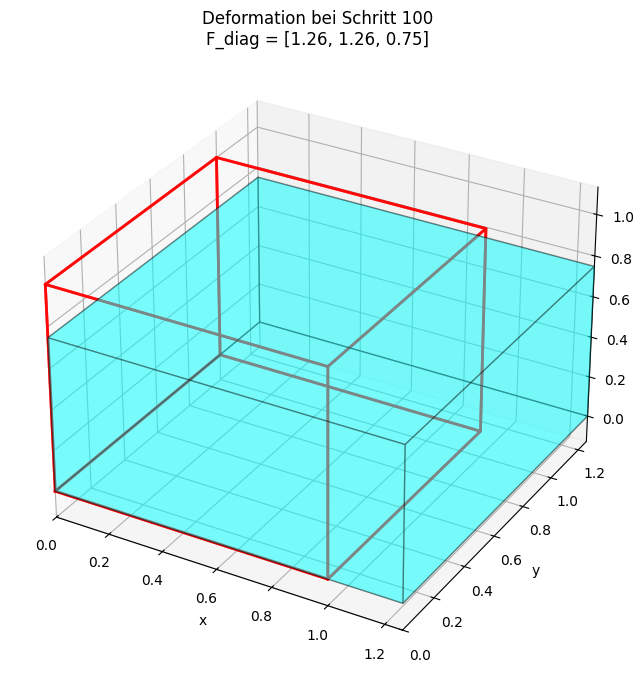

In [ ]:
vis.visualize_deformation_3d(F, step_index=100)

### Task 2

In [4]:
#create P_cal and C_cal datasets for training from all loadcases

# Combine all right Cauchy–Green tensors for calibration
C_cal = jnp.concatenate([C_uni_jx, C_ps_jx, C_bi_jx], axis=0)

# Combine all Piola stresses for calibration
P_cal = jnp.concatenate([P_uni_jx, P_ps_jx, P_bi_jx], axis=0)


In [5]:
# ------------------------------------------------------------
# Convert C (3x3) → vector of 6 independent components
# ------------------------------------------------------------
def C_to_six(C):
    return jnp.array([
        C[0,0], C[1,1], C[2,2],
        C[0,1], C[0,2], C[1,2],
    ])


# ------------------------------------------------------------
# Prepare training data for MS
# F_cal, P_cal, C_cal come from your Task 1 loading code
# ------------------------------------------------------------

X_MS = jax.vmap(C_to_six)(C_cal)   # shape (N,6)
Y_MS = P_cal.reshape(len(P_cal), 9)  # shape (N,9)

# ------------------------------------------------------------
# Build the MS model (uses your existing build() function)
# ------------------------------------------------------------
def build_MS_model(model_key, num_layers, num_nodes):
    model = tm.build(
        key=model_key,
        input_dim=6,             # 6 components of C
        output_dim=9,            # 9 components of P
        num_hidden_layers=num_layers,
        nodes_per_layer=num_nodes,
        activations=jax.nn.softplus,
        constrain_icnn_weights=False   # MS is NOT an ICNN
    )
    return model


# ------------------------------------------------------------
# Train MS model — same structure as Task 1
# ------------------------------------------------------------
def train_MS(model, train_key, steps=100000, batch_size=32, lr=1e-3):
    trained_model, history = tm.train_model(
        model=model,
        train_data=(X_MS, Y_MS),
        key=train_key,
        steps=steps,
        batch_size=batch_size,
        learning_rate=lr,
        loss_fn=tl.MSE(),
    )
    return trained_model, history

In [20]:
model_key_1, train_key_1 = jrandom.split(master_key, 2)

M_S_model = build_MS_model(model_key_1, num_layers=3, num_nodes=16)
M_S_trained, M_S_history = train_MS(M_S_model, train_key_1, steps=500000)

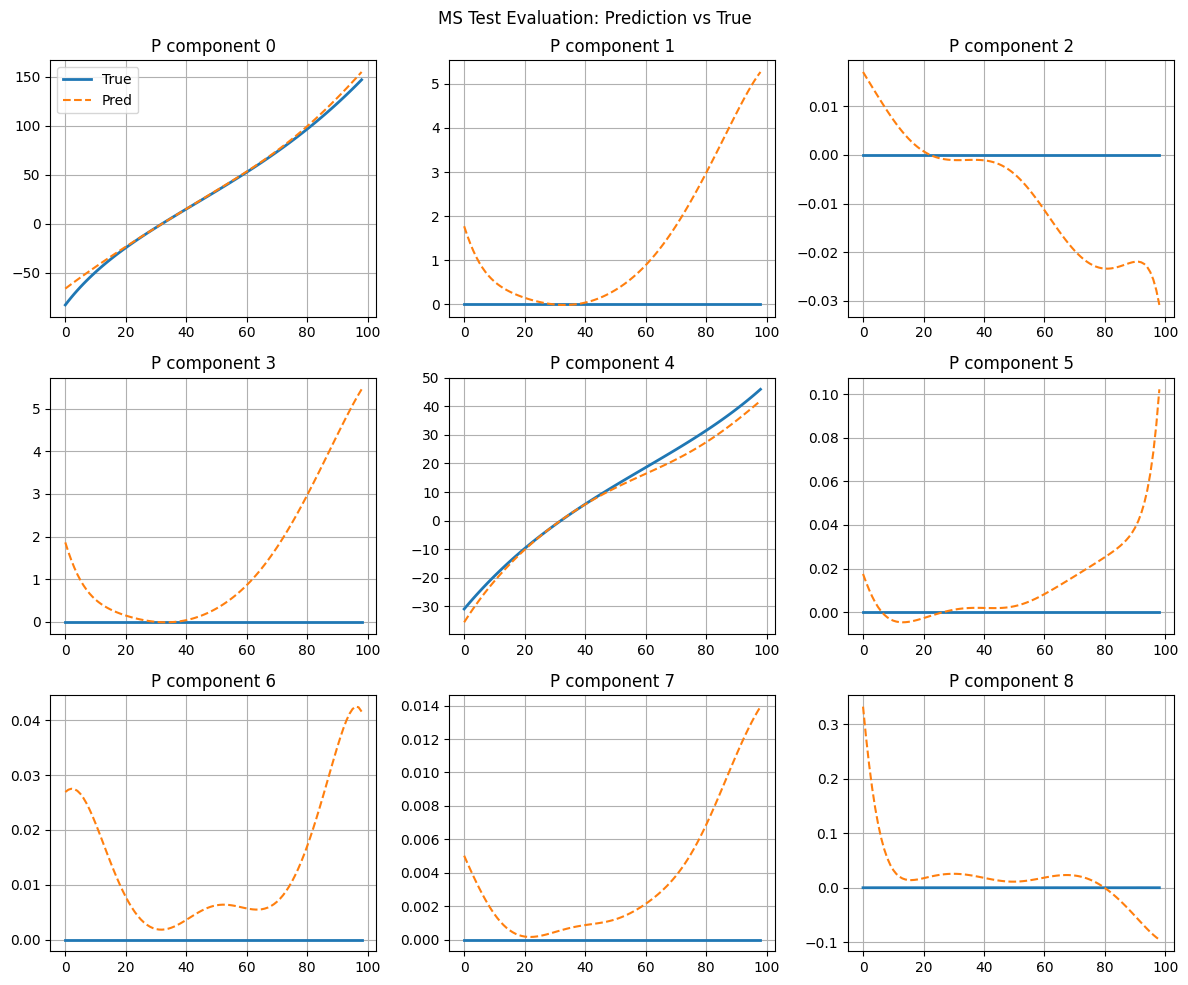

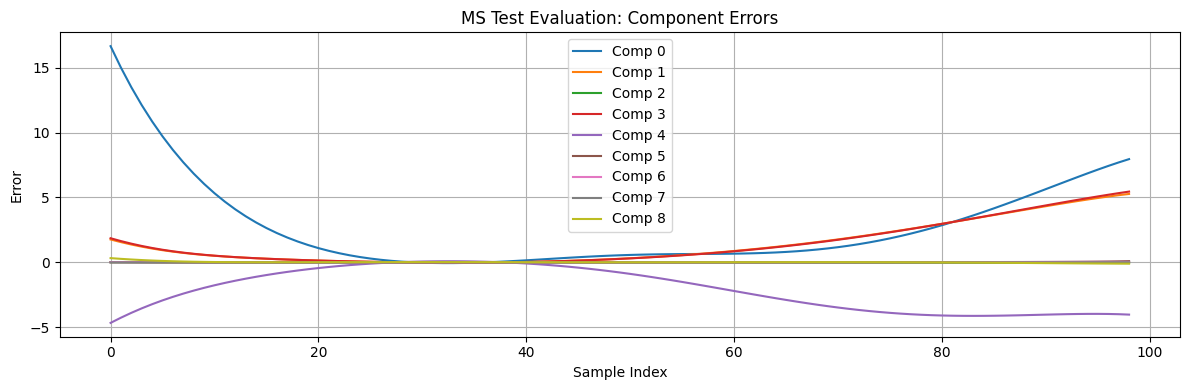

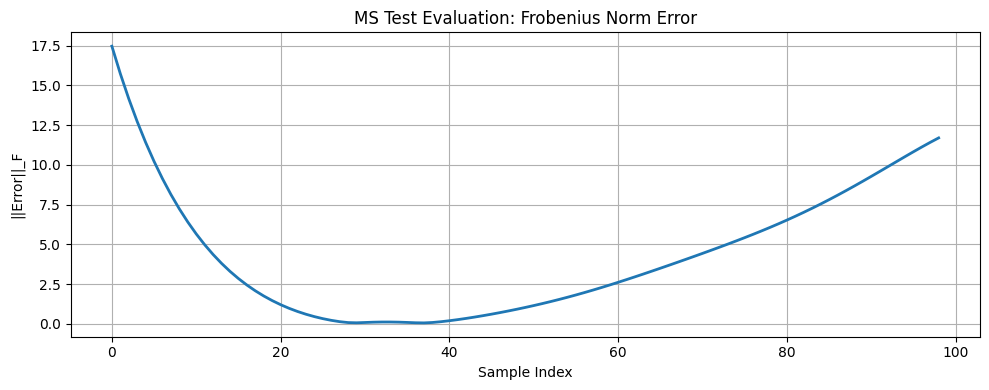

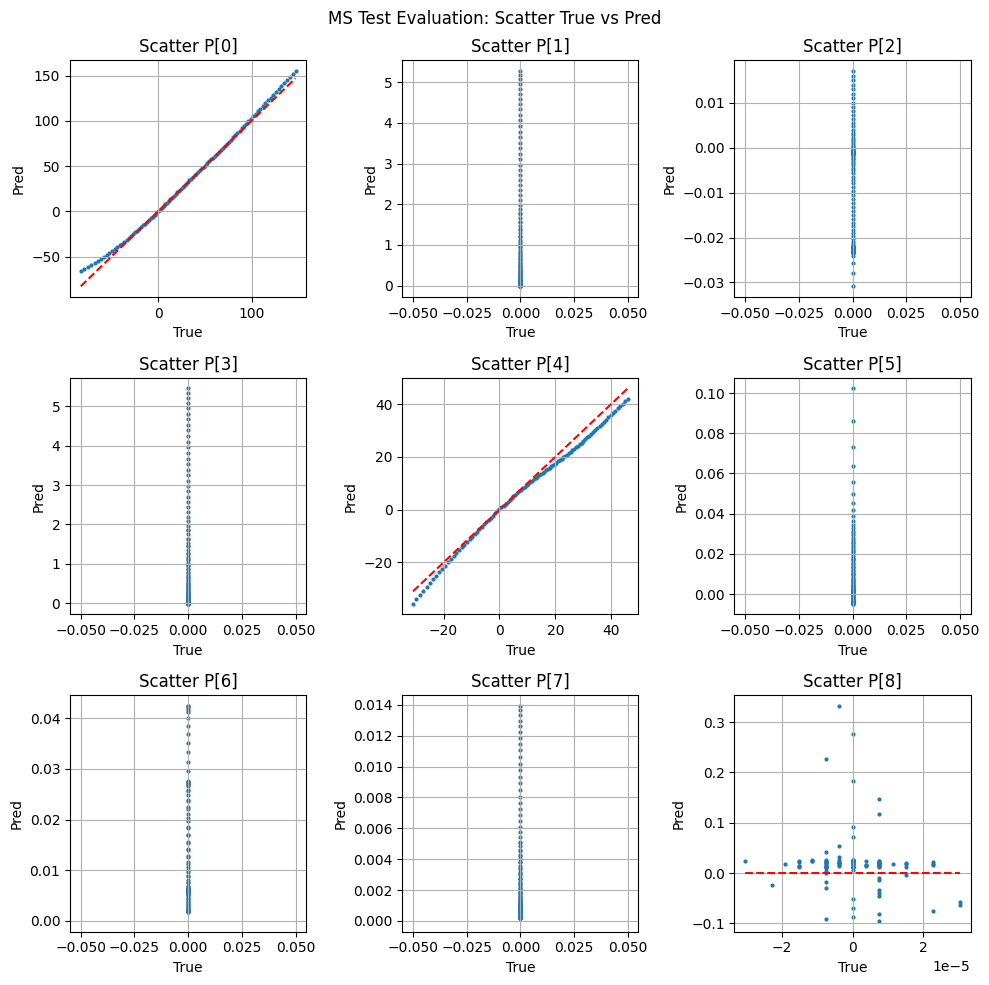

{'mae': Array(0.8624875, dtype=float32), 'rmse': Array(2.0001652, dtype=float32), 'max_error': Array(16.64428, dtype=float32), 'frob_mean': Array(4.3786526, dtype=float32)}


In [21]:
#making predictions on bi_test and evaluating
X_test_MS = jax.vmap(C_to_six)(C_bi_test_jx)   # shape (N,6)
Y_test_MS = P_bi_test_jx.reshape(len(P_bi_test_jx), 9)  # shape (N,9)

test_pred = jax.vmap(M_S_trained)(X_test_MS)

metrics = vis.evaluate_MS_predictions(Y_test_MS, test_pred)

print(metrics)

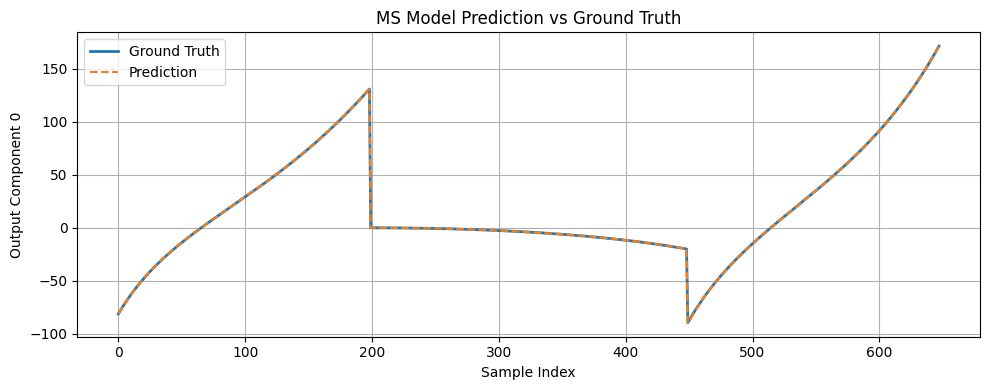

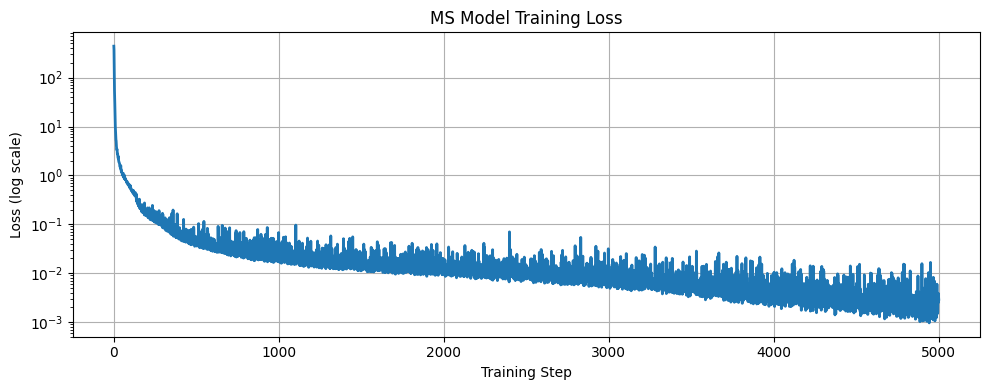

In [22]:
# Suppose X_MS = inputs (C as 6-vec)
# and     Y_MS = outputs (P as 9-vec)

vis.plot_model_and_history(
    M_S_trained,
    X_MS,
    Y_MS,
    M_S_history,
    title_model="MS Model Prediction vs Ground Truth",
    title_history="MS Model Training Loss"
)

### Task 2.3 Loss weighted strategy

In [23]:
#Compute weights
w_uni = td2.compute_path_weight(P_uni_jx)
w_ps  = td2.compute_path_weight(P_ps_jx)
w_bi  = td2.compute_path_weight(P_bi_jx)

#Compute 1/w
w_uni_inv = 1 / w_uni
w_ps_inv  = 1 / w_ps
w_bi_inv  = 1 / w_bi

#assign weights to samples as jnp array
weights_uni = w_uni_inv * jnp.ones(len(P_uni_jx))
weights_ps  = w_ps_inv  * jnp.ones(len(P_ps_jx))
weights_bi  = w_bi_inv  * jnp.ones(len(P_bi_jx))

sample_weights = jnp.concatenate([weights_uni, weights_ps, weights_bi])


#defined new training function tht accepts "train_data", clean up later
def train_M_w(*, model, train_data, key, steps=10000, batch_size=64, lr=1e-3, loss_fn=None):
    trained_model, history = tm.train_model(
        model=model,
        train_data=train_data,
        key=key,
        steps=steps,
        batch_size=batch_size,
        learning_rate=lr,
        loss_fn=loss_fn
    )
    return trained_model, history


In [24]:
#format training data
train_data = (X_MS, (Y_MS, sample_weights))
#use weighted loss function
loss_fn = tl.WeightedMSE(sample_weights)

model_key_2, train_key_2 = jrandom.split(master_key, 2)

M_w_model = build_MS_model(model_key_2, 3, 16)
trained_M_w, history_M_w = train_M_w(model=M_w_model, train_data=train_data, key=train_key_2, steps=500000,loss_fn=loss_fn)


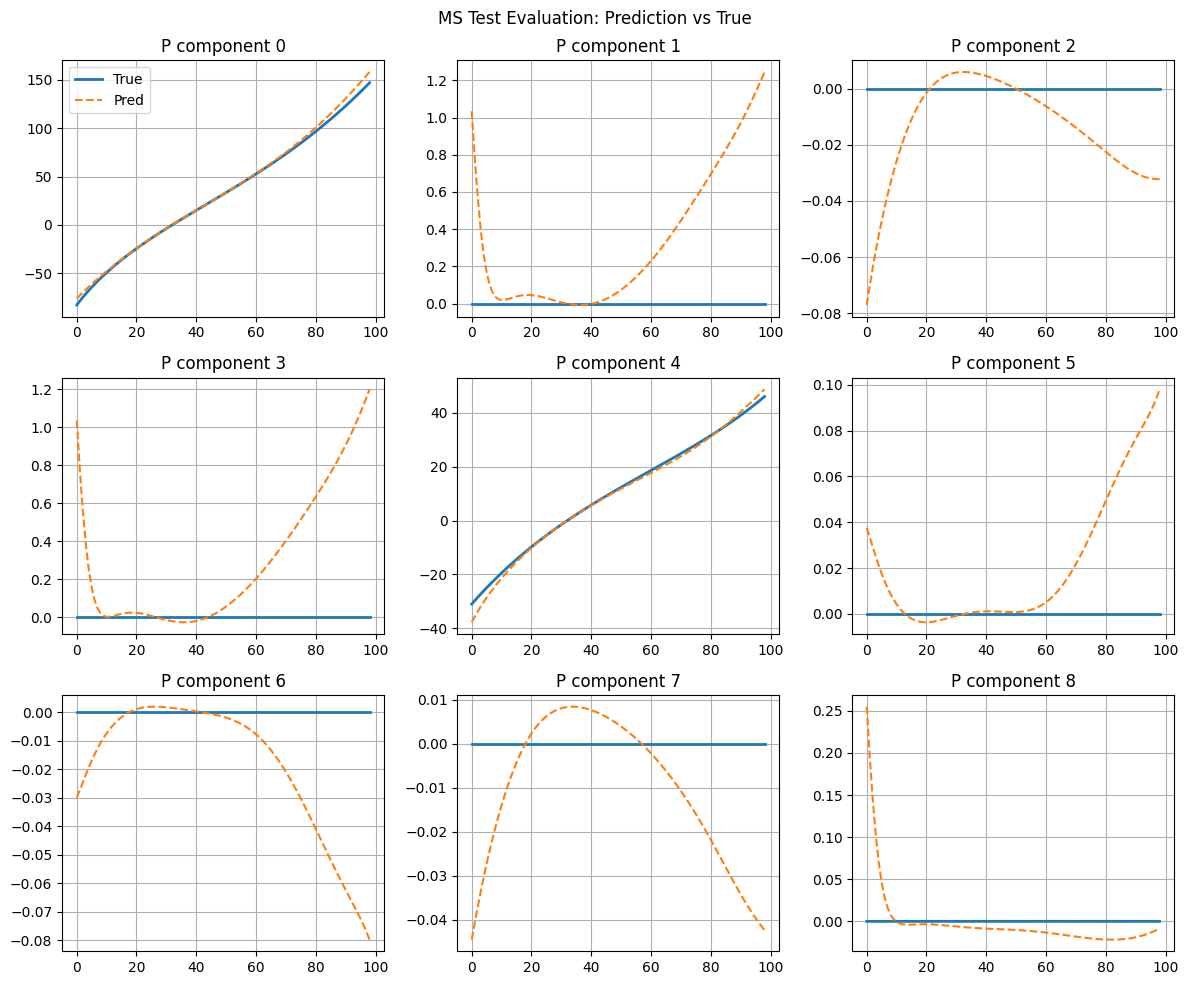

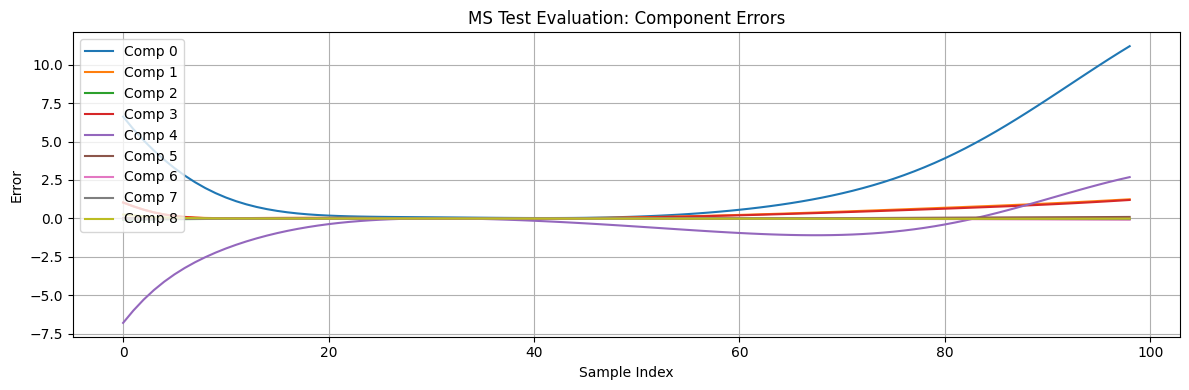

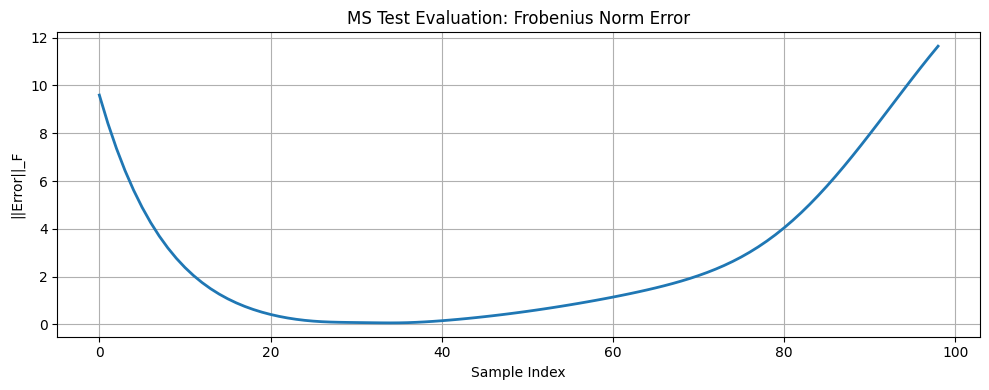

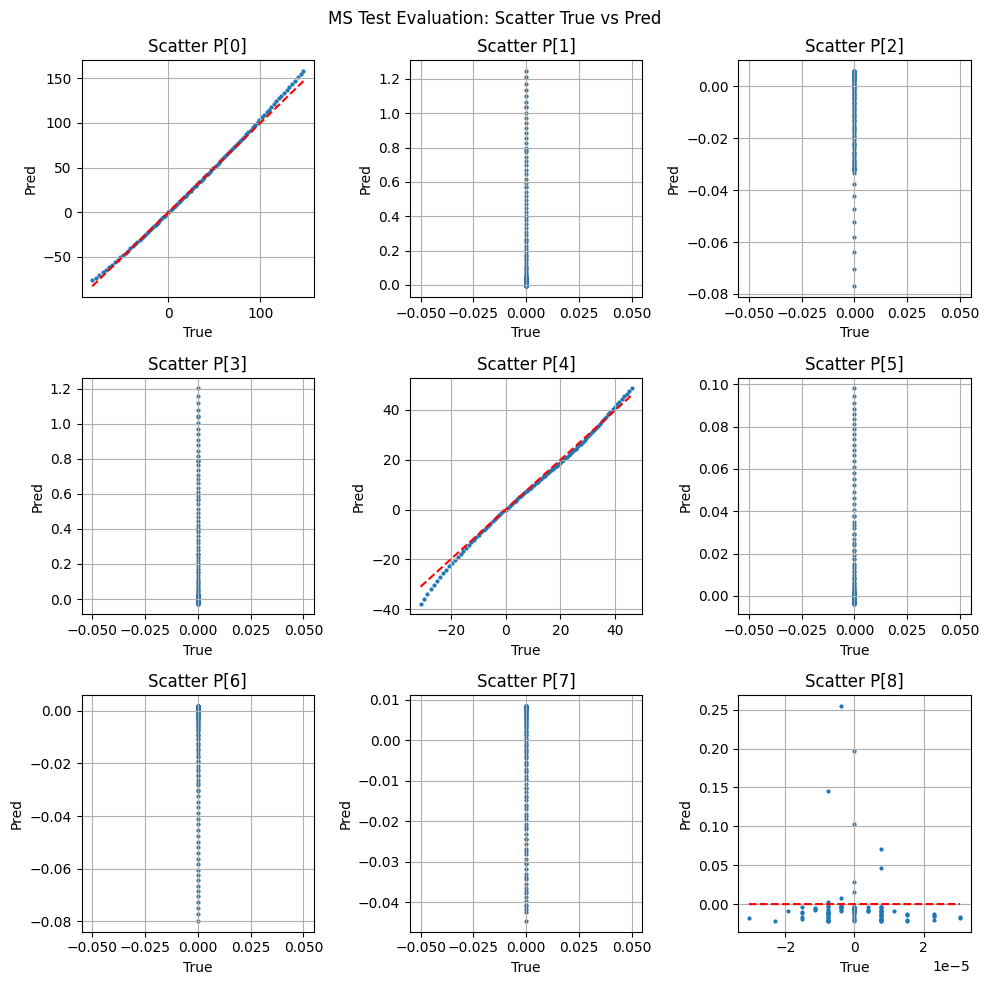

{'mae': Array(0.45156106, dtype=float32), 'rmse': Array(1.3854709, dtype=float32), 'max_error': Array(11.197372, dtype=float32), 'frob_mean': Array(2.7366605, dtype=float32)}


In [25]:
#making predictions on bi_test and evaluating
X_test_MS = jax.vmap(C_to_six)(C_bi_test_jx)   # shape (N,6)
Y_test_MS = P_bi_test_jx.reshape(len(P_bi_test_jx), 9)  # shape (N,9)

test_pred = jax.vmap(trained_M_w)(X_test_MS)

metrics = vis.evaluate_MS_predictions(Y_test_MS, test_pred)

print(metrics)

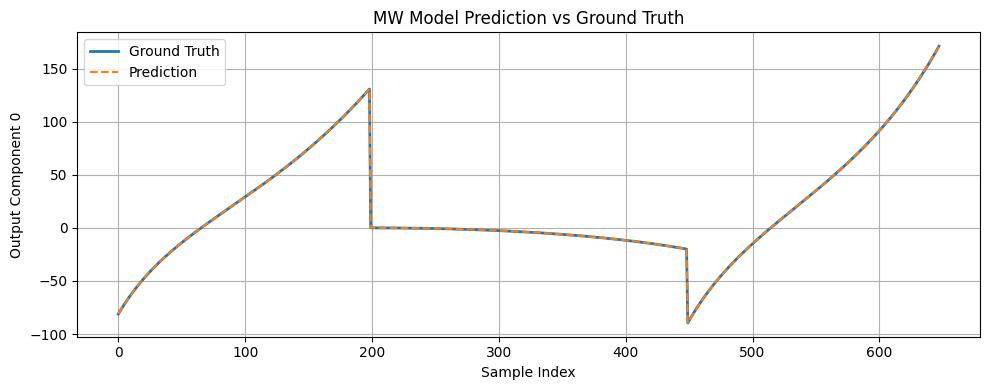

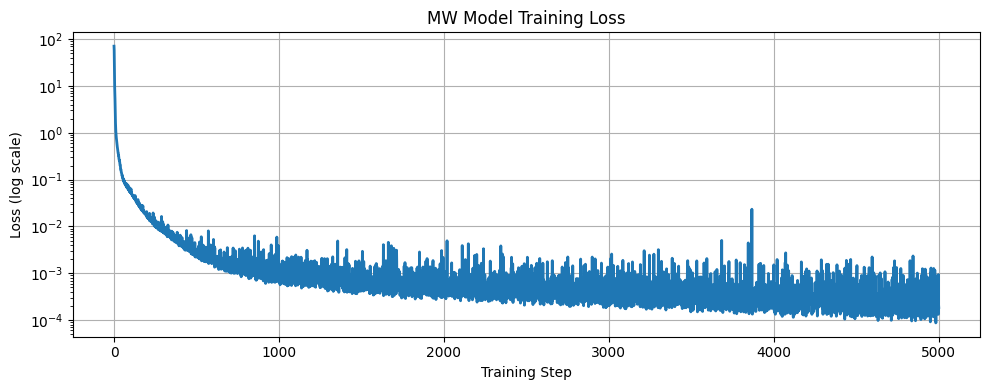

In [26]:
# Suppose X_MS = inputs (C as 6-vec)
# and     Y_MS = outputs (P as 9-vec)

vis.plot_model_and_history(
    trained_M_w,
    X_MS,
    Y_MS,
    history_M_w,
    title_model="MW Model Prediction vs Ground Truth",
    title_history="MW Model Training Loss"
)

### Task 3.1

The new hyperelastic potential is now formulated in terms of the invariants of the right Cauchy Green tensor as:

$W(I) = W(I_1, J, -J, I_4, I_5)$\
with Invariants: $I_1 = tr C,\ J = det\ F,\ I_4 = tr(CG_{ti}),\ I_5 = tr(Cof\ CG_{ti})$

In the task we are using an ICNN to model this potential like:
$W(I_1, J, -J, I_4, I_5) = ICNN (I_1, J, -J, I_4, I_5)$

Crucially, we observe that in the task description $J$ and $-J$ are passed as inputs. This implies that the potential must be convex for positive **AND** negative volume changes in the body ($J = det\ F$) in order to be physically sensible. However, in the classic ICNN the weights in the first layer are not restricted. This means the ICNN is convex in the inputs to the first hidden layer\
(denoted as the vector $\mathbf{u}$) which are some linear transformation of the ICNN inputs. This means that in theory the ICNN could learn some linear transformation in the first layer like:\
$u = -1 \times (J) \in \mathbf{u}$

From this we can see that the network could for example learn an input vector to its first hidden layer $\mathbf{u} = [..., u_2=-1 \times (J), u_3 = -J,...]^T$, meaning the ICNN would be convex only in $-J$ but not in $J$. Therefore, we must also restrict the weights in the first layer to be non negative to ensure the ICNN satisfies polyconvexity in the sense of the potential $W(I)$.

Note that since we want to predict stresses, we need something like our SobolevModel class from Task 1, which is a wrapper for the above described ICNN but also automatically computes and outputs the gradient of the output of the ICNN. But in Task 1 we simply needed the gradient of the network with respect to its input. Here because the network input are the invariants $I$ and the gradient has to be computed with respect to $F$ like:

$$W(I_1, J, -J, I_4, I_5) = ICNN_1 (I_1, J, -J, I_4, I_5)$$

$$P(W) = ICNN_2 = \frac {\partial ICNN_1(I(F))}{\partial F} = \frac {\partial ICNN_1(I)}{\partial I}\ \frac {\partial I(F)}{\partial F}$$

We need an extension of the SobolevModel calss which we called SobolevModel_WI and implemented in models.py with its own dedicated training function that can handle the new data structures.

In [49]:
model_key_3, train_key_3 = jrandom.split(master_key, 2)

W_I_model = tm.SobolevModel_WI(
            G_ti = G_ti,
            key=model_key_3,
            input_dim=5,
            output_dim="scalar", # Use "scalar" for jax.grad
            num_hidden_layers=3,
            nodes_per_layer=16,
            activation=jax.nn.softplus,
            is_icnn=False,
            is_ficnn=True #non-negative constraint also on first layer
        )        

### 3.2 Model Calibration

We will first use all loadpaths in the calibration folder for calibrating a model to test the three strategies:\
A) use only energy W\
B) use only stress P\
C) use both

Then we will decide on one of the strategies and use that to test using different load paths for calibration like:\
1. only uniaxial
2. ...

In [76]:
#reload data to avoid any index mismatch through previous operations
F_uni, P_uni, W_uni = td2.load_hyperelastic_data(os.path.join(base_path, r"calibration\uniaxial.txt"))
F_ps, P_ps, W_ps = td2.load_hyperelastic_data(os.path.join(base_path, r"calibration\pure_shear.txt"))
F_bi, P_bi, W_bi = td2.load_hyperelastic_data(os.path.join(base_path, r"calibration\biaxial.txt"))
F_bi_test, P_bi_test, W_bi_test = td2.load_hyperelastic_data(os.path.join(base_path, r"test\biax_test.txt"))
F_mix_test, P_mix_test, W_mix_test = td2.load_hyperelastic_data(os.path.join(base_path, r"test\mixed_test.txt"))

# Convert to JAX array
F_bi_jx = jnp.array(F_bi)
W_bi_jx = jnp.array(W_bi)
P_bi_jx = jnp.array(P_bi)

F_uni_jx = jnp.array(F_uni)  
W_uni_jx = jnp.array(W_uni)
P_uni_jx = jnp.array(P_uni)

F_ps_jx = jnp.array(F_ps)  
W_ps_jx = jnp.array(W_ps)
P_ps_jx = jnp.array(P_ps)

F_bi_test_jx = jnp.array(F_bi_test)  
W_bi_test_jx = jnp.array(W_bi_test)
P_bi_test_jx = jnp.array(P_bi_test)

F_mix_test_jx = jnp.array(F_mix_test)  
W_mix_test_jx = jnp.array(W_mix_test)
P_mix_test_jx = jnp.array(P_mix_test)

# load all invariants
invariants_path = os.path.join(base_path, "invariants")

I_uniaxial      = td2.load_invariants(os.path.join(invariants_path, "I_uniaxial.txt"))
I_biaxial       = td2.load_invariants(os.path.join(invariants_path, "I_biaxial.txt"))
I_pure_shear    = td2.load_invariants(os.path.join(invariants_path, "I_pure_shear.txt"))

# Test cases
I_mixed_test    = td2.load_invariants(os.path.join(invariants_path, "I_mixed_test.txt"))
I_biax_test     = td2.load_invariants(os.path.join(invariants_path, "I_biax_test.txt"))

#add -J
I_uniaxial      = td2.add_minus_J(I_uniaxial)
I_biaxial       = td2.add_minus_J(I_biaxial)
I_pure_shear    = td2.add_minus_J(I_pure_shear)

# Test cases
I_mixed_test    = td2.add_minus_J(I_mixed_test)
I_biax_test     = td2.add_minus_J(I_biax_test)

#### Strategy A using all loadpaths

In [ ]:
#define datasets for calibration
F_cal_all = jnp.concatenate([F_bi_jx, F_uni_jx, F_ps_jx], axis=0)
I_cal_all = jnp.concatenate([I_biaxial, I_uniaxial, I_pure_shear], axis=0)
W_cal_all = jnp.concatenate([W_bi_jx, W_uni_jx, W_ps_jx], axis=0)
P_cal_all = jnp.concatenate([P_bi_jx, P_uni_jx, P_ps_jx], axis=0)

"""
    train_data = (F_train, I_train, (W_true, P_true))
    """

# This loss function trains only on the function values (W).
sobolev_loss_fn_a = tl.SobolevLoss(alpha=1.0, beta=0.0)

# Train the model for strategy A
W_I_model_A, W_I_model_history_A = tm.train_WI(
    model=W_I_model,
    train_data=((F_cal_all,I_cal_all), (W_cal_all, P_cal_all)), # Pass the combined data
    key=train_key_3,
    steps=100000,
    batch_size=32,
    learning_rate=1e-3,
    loss_fn=sobolev_loss_fn_a # Pass the gradient-only loss
)

#### Strategy B using all loadpaths

In [ ]:
# This loss function trains only on the function values (W).
sobolev_loss_fn_b = tl.SobolevLoss(alpha=0.0, beta=1.0)

# Train the model for strategy A
W_I_model_A, W_I_model_history_A = tm.train_WI(
    model=W_I_model,
    train_data=((F_cal_all,I_cal_all), (W_cal_all, P_cal_all)), # Pass the combined data
    key=train_key_3,
    steps=100000,
    batch_size=32,
    learning_rate=1e-3,
    loss_fn=sobolev_loss_fn_b # Pass the gradient-only loss
)

#### Strategy C using all loadpaths

In [ ]:
# This loss function trains only on the function values (W).
sobolev_loss_fn_c = tl.SobolevLoss(alpha=1.0, beta=1.0)

# Train the model for strategy A
W_I_model_A, W_I_model_history_A = tm.train_WI(
    model=W_I_model,
    train_data=((F_cal_all,I_cal_all), (W_cal_all, P_cal_all)), # Pass the combined data
    key=train_key_3,
    steps=100000,
    batch_size=32,
    learning_rate=1e-3,
    loss_fn=sobolev_loss_fn_c # Pass the gradient-only loss
)

#### Strategy X using different loadpaths

In [ ]:
#define datasets for calibration
F_cal_subs = jnp.concatenate([F_bi_jx, F_uni_jx, F_ps_jx], axis=0) #only use certain loadcases
I_cal_subs = jnp.concatenate([I_biaxial, I_uniaxial, I_pure_shear], axis=0) #only use certain loadcases
W_cal_subs = jnp.concatenate([W_bi_jx, W_uni_jx, W_ps_jx], axis=0) #only use certain loadcases
P_cal_subs = jnp.concatenate([P_bi_jx, P_uni_jx, P_ps_jx], axis=0) #only use certain loadcases

# This loss function trains only on the function values (W).
sobolev_loss_fn_a = tl.SobolevLoss(alpha=1.0, beta=0.0)

# Train the model for strategy A
W_I_model_A, W_I_model_history_A = tm.train_WI(
    model=W_I_model,
    train_data=((F_cal_subs,I_cal_subs), (W_cal_subs, P_cal_subs)), # Pass the combined data
    key=train_key_3,
    steps=100000,
    batch_size=32,
    learning_rate=1e-3,
    loss_fn=sobolev_loss_fn_a # Pass the gradient-only loss
)

### Task 4